<a href="https://colab.research.google.com/github/liyanauk/CognoRise-Infotech/blob/main/Task3_CredictCard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **CREDICT CARD FRAUD DETECTION**

In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#loading the dataset
df=pd.read_csv('/content/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [300]:
#display the first 5 rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [301]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [302]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [304]:
df.shape

(284807, 31)

In [305]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [306]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [307]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

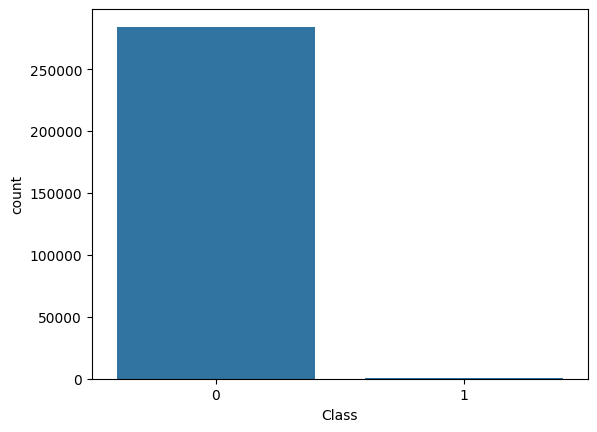

In [308]:
sns.countplot(x="Class",data=df)
plt.show

In [309]:
#calculate the ratio of frauduient to non-frauduient transactions
fraud_ratio=df['Class'].value_counts(normalize=True)
fraud_ratio

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

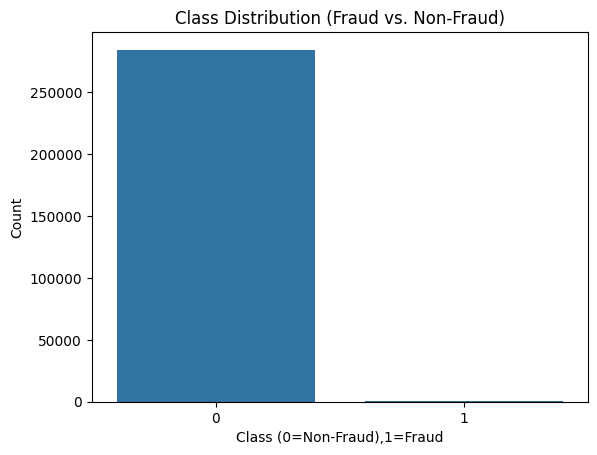

In [310]:
sns.countplot(x='Class',data=df)
plt.title('Class Distribution (Fraud vs. Non-Fraud)')
plt.xlabel('Class (0=Non-Fraud),1=Fraud')
plt.ylabel('Count')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


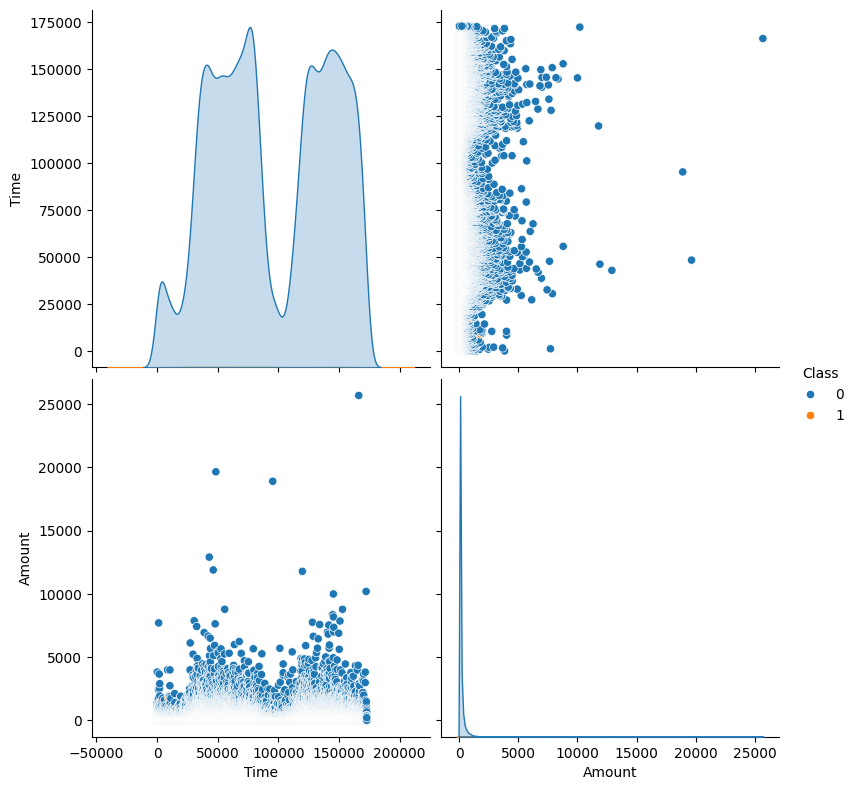

In [311]:
#Relation between Time and Amount
df_refine=df[["Time","Amount","Class"]]
sns.pairplot(df_refine,hue="Class",size=4)
plt.show()

From this,there are no transactions above 2500 amount which are fraud andthis implies that smaller transactions are more prone to fraud in order to prevent raising suspicion.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


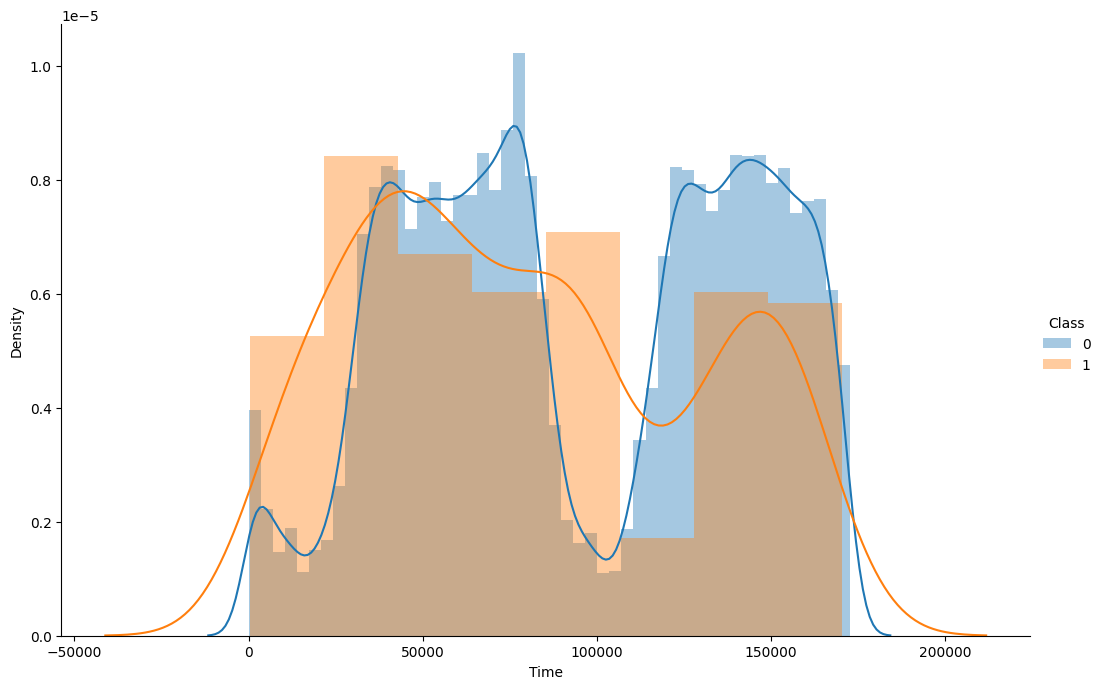

In [312]:
#Relation between Time and Transactions
sns.FacetGrid(df_refine,hue="Class",height=7,aspect=1.5).map(sns.distplot,"Time").add_legend()
plt.show()

The fraud transactions are equitably distributed throughout time,as evident from the distribution plot above.

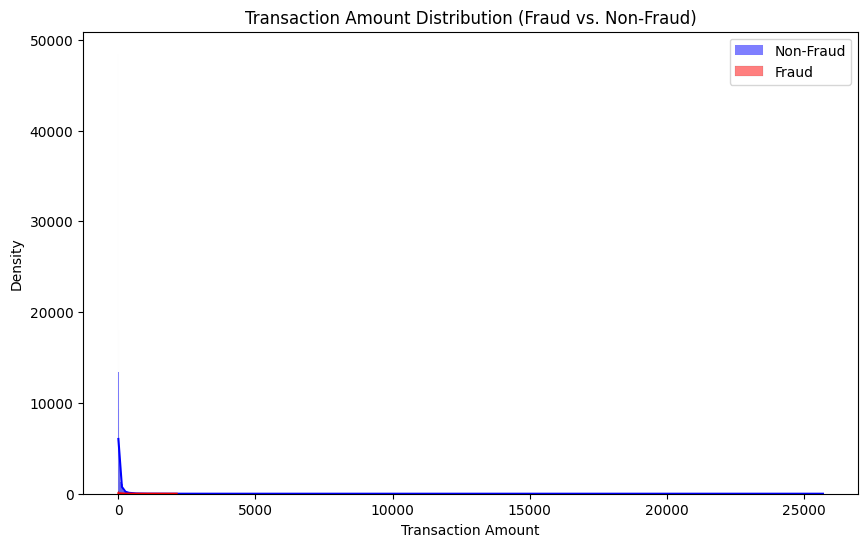

In [313]:
# Histogram to compare transaction amounts for both classes
plt. figure(figsize=(10, 6))
sns.histplot(df[df['Class'] == 0]['Amount'], kde=True, color='blue', label='Non-Fraud')
sns. histplot(df[df['Class'] == 1]['Amount'], kde=True, color='red', label='Fraud')
plt. title("Transaction Amount Distribution (Fraud vs. Non-Fraud)")
plt. xlabel("Transaction Amount")
plt.ylabel ("Density")
plt. legend()
plt. show()

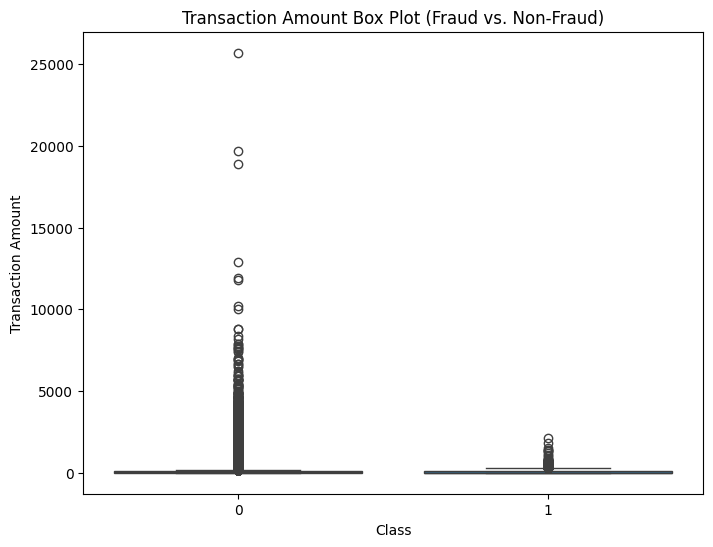

In [314]:
# Box plot for the same comparison
plt. figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt. title('Transaction Amount Box Plot (Fraud vs. Non-Fraud)')
plt. xlabel('Class')
plt. ylabel("Transaction Amount")
plt. show()

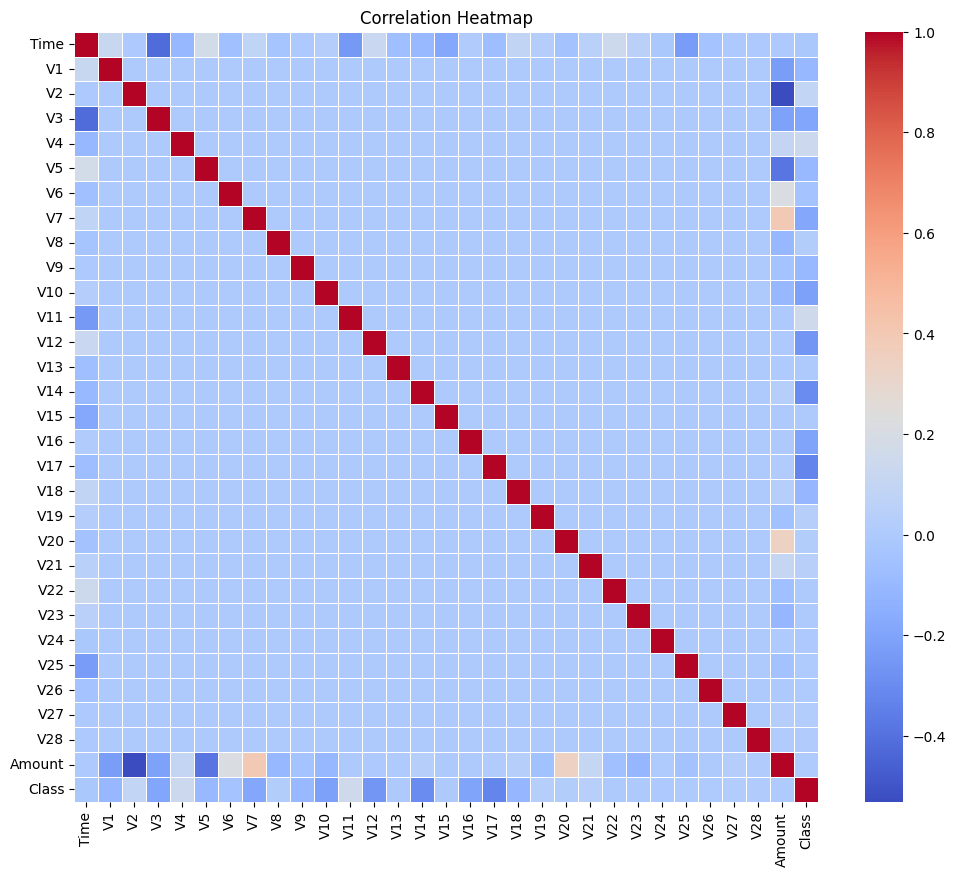

In [315]:
corr_matrix=df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix,annot=False,cmap='coolwarm',linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [316]:
#seperate dataset in x and y
x=df.drop(["Class"],axis=1)
y=df["Class"]
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [317]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

**OVERSAMPLING**

In [318]:
#OVERSAMPLING
#Doing oversampling for the dataset due to the imbalance of data
from imblearn.over_sampling import SMOTE
smote=SMOTE(
    sampling_strategy='auto',
    random_state=0,
    k_neighbors=3
)
x_new,y_new=smote.fit_resample(x,y)

In [319]:
#checking the shape of x and y column after oversampling
x_new.shape,y_new.shape

((568630, 30), (568630,))

In [320]:
#train-test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.2,random_state=42)
x_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
373474,110273.088462,0.532100,1.290690,-2.567003,3.744651,0.126122,-0.633563,-1.581832,0.481807,-0.289942,...,0.005593,0.152501,-0.142374,-0.067356,-0.274602,-0.060893,0.365861,0.161020,-0.073568,0.90291
424048,27167.803632,-24.049432,13.821709,-25.842810,6.296757,-17.872828,-4.579997,-17.448856,15.878098,-3.814681,...,1.641872,1.774133,-1.759724,-1.102612,0.148694,1.674241,-0.220914,1.453447,0.428749,99.99000
409855,12740.800434,-2.668565,6.529785,-12.987200,9.350141,-3.717083,-2.834635,-9.817417,3.530384,-5.049405,...,1.408009,1.919038,0.338648,0.425641,-1.075491,-0.950294,0.592515,1.796535,0.733549,1.00000
90244,62934.000000,-1.119211,-0.076681,2.532709,0.480750,-0.939219,0.296271,-0.722636,0.130148,1.505440,...,-0.184620,0.016087,0.576419,-0.172156,0.554262,-0.706867,1.076114,-0.329812,0.256419,24.33000
175414,122324.000000,2.048996,-0.366883,-2.543852,-0.728626,2.387568,3.318339,-0.477944,0.791325,0.403268,...,-0.153145,-0.292818,-0.835277,0.380947,0.698226,-0.265129,0.219179,-0.052301,-0.066783,1.79000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,71750.000000,0.960530,-1.006608,0.799673,-1.216255,-1.541568,-0.670999,-0.610605,0.058303,1.696968,...,0.171371,0.254714,0.653521,-0.204047,0.621861,0.370590,0.070796,0.015218,0.037579,135.00000
259178,159000.000000,-0.775981,0.144023,-1.142399,-1.241113,1.940358,3.912076,-0.466107,1.360620,0.400697,...,-0.295730,0.037078,-0.019575,0.241830,0.682820,-1.635109,-0.770941,0.066006,0.137056,89.23000
365838,95591.528360,-16.879197,12.066104,-19.408989,10.806606,-13.049628,-0.829746,-23.290413,-5.554980,-8.197293,...,2.305201,-4.924816,1.063226,1.604290,0.342124,-1.485177,-0.531856,-2.980120,-0.469977,1.63000
131932,79795.000000,-0.146609,0.992946,1.524591,0.485774,0.349308,-0.815198,1.076640,-0.395316,-0.491303,...,0.007155,0.052649,0.354089,-0.291198,0.402849,0.237383,-0.398467,-0.121139,-0.196195,3.94000


In [321]:
x_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
437378,20243.102793,-15.119950,8.201564,-22.209462,11.891089,-8.618147,-2.307286,-16.095897,0.392411,-6.340096,...,0.994048,-2.358405,1.076753,1.072208,-1.038845,-0.202159,0.647822,2.152538,-1.405280,1.000000
504222,154621.869306,-2.115172,2.075973,-6.360989,6.411955,2.057474,-2.844088,-3.061734,1.092983,-4.023405,...,1.313443,0.697459,-0.462429,-0.280683,-1.016496,-0.031209,0.521656,0.748626,0.040419,8.102461
4794,4267.000000,-0.851994,0.935553,2.188136,0.709286,0.178930,-0.349335,0.857609,-0.416252,1.066375,...,0.270933,-0.411022,-0.404762,-0.096893,0.404476,0.377388,0.344173,-0.000311,-0.125090,30.530000
388411,41818.239679,-12.632986,7.577264,-15.052484,5.832364,-10.449512,-2.457756,-13.453231,3.109635,-5.255714,...,0.641050,-0.492591,-0.107855,-0.241063,0.267442,-0.223234,-0.090404,-0.883575,-0.429876,118.108927
424512,41322.599878,-14.115584,7.342360,-14.590219,7.711814,-11.586329,-3.350416,-14.634178,8.886410,-7.670448,...,-0.915804,2.838870,0.066197,-0.404439,0.634288,0.415682,0.207360,-1.375606,-0.677841,11.583376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172633,121179.000000,-0.810021,1.603650,-1.274443,-0.508207,0.254194,-0.887096,0.191640,0.807375,-0.111960,...,-0.114829,-0.291799,-0.908561,0.203236,0.483011,-0.354269,0.130390,0.092804,-0.002514,9.990000
183013,125619.000000,2.161885,-1.075282,-0.437522,-0.995617,-1.203724,-0.381303,-1.285184,0.093414,0.060538,...,-0.095575,0.408740,1.173455,0.107098,-0.328351,-0.222600,-0.060862,0.007088,-0.062290,0.000000
484066,11487.410155,-3.190473,6.258211,-10.965202,8.055617,-2.828762,-2.725946,-8.693389,2.922017,-5.413222,...,1.390597,1.787960,-0.019825,-0.191775,-1.069906,0.354102,0.575900,1.908746,0.828731,1.000000
426713,41262.906620,-11.093976,6.394408,-13.105450,7.653285,-10.753052,-2.643340,-11.996225,6.904192,-7.529374,...,-0.929467,2.054999,-1.261251,-0.009435,0.579296,0.374214,-0.399960,-0.426925,-0.738206,235.824493


In [322]:
y_train

373474    1
424048    1
409855    1
90244     0
175414    0
         ..
110268    0
259178    0
365838    1
131932    0
121958    0
Name: Class, Length: 454904, dtype: int64

In [323]:
y_test

437378    1
504222    1
4794      0
388411    1
424512    1
         ..
172633    0
183013    0
484066    1
426713    1
272068    0
Name: Class, Length: 113726, dtype: int64

In [324]:
#Model Evaluation by applying LogisticRegression Algorithm
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [325]:
y_pred=model.predict(x_test)
y_pred

array([1, 1, 0, ..., 1, 1, 0])

In [326]:
#checking accuracy of the model
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9588924256546436

In [327]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cmd=confusion_matrix(y_test,y_pred)
cmd

array([[54895,  1855],
       [ 2820, 54156]])

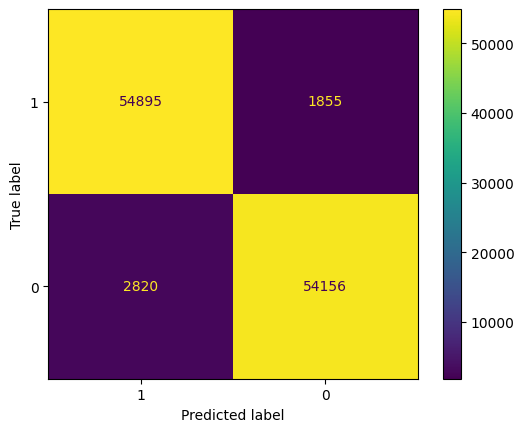

In [328]:
#Heat map for Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay
lab=[1,0]
cmd1=ConfusionMatrixDisplay(cmd,display_labels=lab)
cmd1.plot()

In [329]:
#checking classification report of the model to check Precision and Recall
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     56750
           1       0.97      0.95      0.96     56976

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



In [298]:
#Model Evaluation by applying RandomForestClassifier Algorithm
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier()
model2.fit(x_train,y_train)

RandomForestClassifier()

In [330]:
y_pred2=model2.predict(x_test)
y_pred2

array([1, 1, 0, ..., 1, 1, 0])

In [331]:
accuracy=accuracy_score(y_test,y_pred2)
accuracy

0.9999120693596891

In [332]:
cmd=confusion_matrix(y_test,y_pred2)
cmd

array([[56740,    10],
       [    0, 56976]])

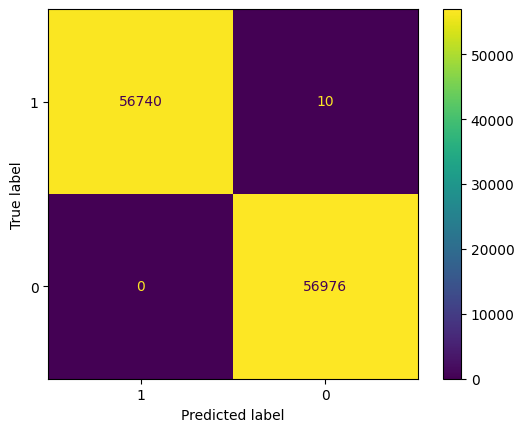

In [333]:
#Heat map for Confusion Matrix
lab=[1,0]
cmd1=ConfusionMatrixDisplay(cmd,display_labels=lab)
cmd1.plot()

In [334]:
#checking classification report of the model to check Precision and Recall
cr=classification_report(y_test,y_pred2)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



from the results,RandomForestClassifier gives the best accurcy of the model without compromising its efficiency.